<a href="https://colab.research.google.com/github/ffathy-tdx/waiter-s-tips-prediction/blob/main/tipsMLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


df = pd.read_csv('/content/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [82]:
print(df.isna().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [83]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


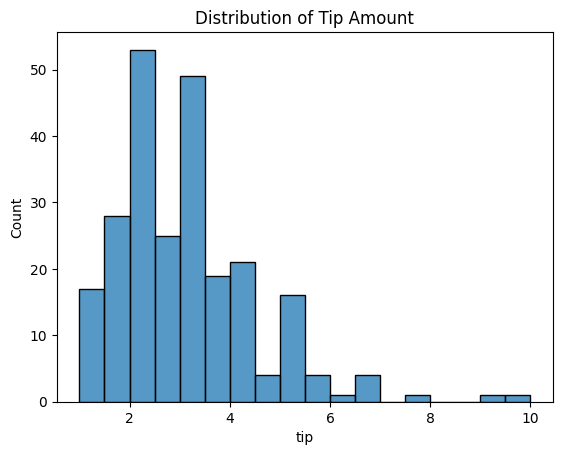

In [84]:
sns.histplot(data=df, x='tip')
plt.title('Distribution of Tip Amount')
plt.show()

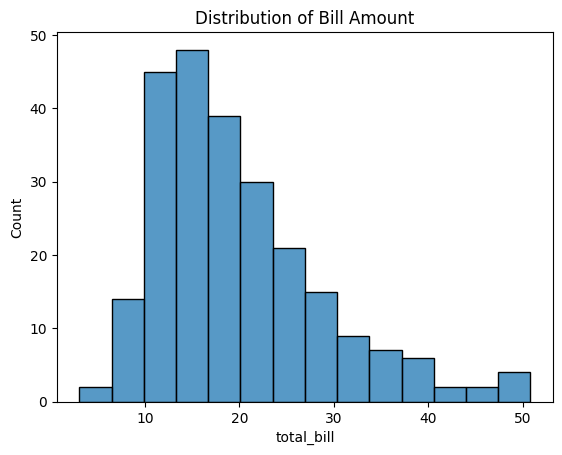

In [85]:
sns.histplot(data=df, x='total_bill')
plt.title('Distribution of Bill Amount')
plt.show()

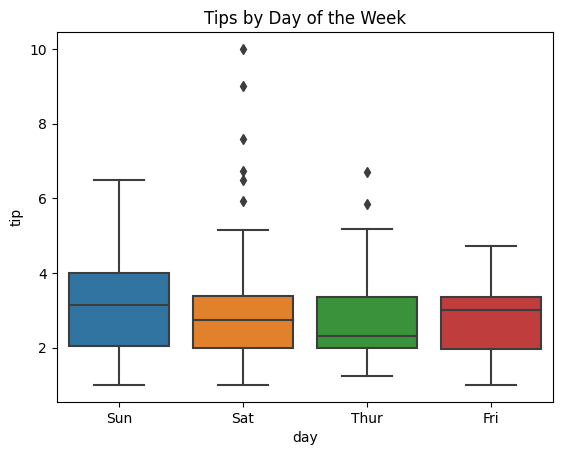

In [86]:
sns.boxplot(data=df, x='day', y='tip')
plt.title('Tips by Day of the Week')
plt.show()

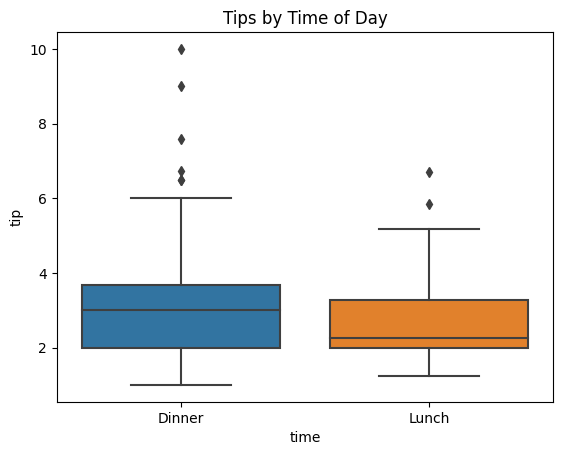

In [87]:
sns.boxplot(data=df, x='time', y='tip')
plt.title('Tips by Time of Day')
plt.show()

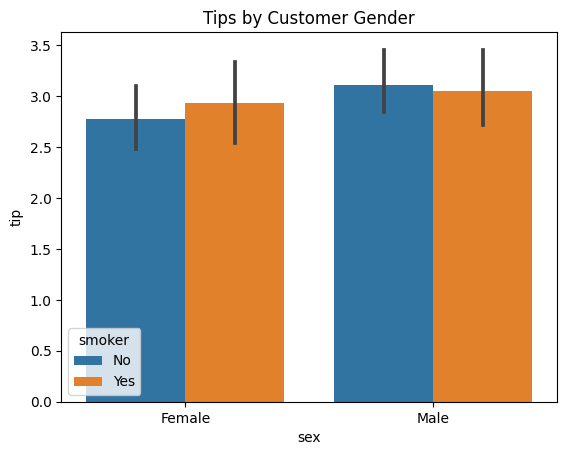

In [88]:
sns.barplot(data=df, x='sex', y='tip', hue="smoker")

plt.title('Tips by Customer Gender')
plt.show()

Now we are done loading the tipping dataset, checking for missing values, and performing several EDA tasks. The histograms show that both the tip amount and bill amount are right-skewed, which may require some data transformation later. The box plots and bar plot reveal some potential relationships between tips and other variables such as day of the week, time of day, and customer gender.

Next, we can split the dataset into a training set and testing set and build our predictive model.




In [89]:
figure = px.scatter(data_frame = df, x="total_bill",y="tip", size="size", color= "day", trendline="ols")
figure.show()

In [90]:
figure = px.scatter(data_frame = df, x="total_bill",y="tip", size="size", color= "time", trendline="ols")
figure.show()

In [91]:
figure = px.pie(df, values='tip', names='day')
figure.show()

In [92]:
figure = px.pie(df, values='tip', names='sex')
figure.show()

In [93]:
figure = px.pie(df, values='tip', names='smoker')
figure.show()

In [94]:
figure = px.pie(df, values='tip', names='time')
figure.show()

In [102]:
corr = df.corr()
corr

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,0.173693,0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,0.135499,0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,0.230791,0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,-0.032653,0.054921,-0.133178
day,0.173693,0.135499,0.230791,-0.032653,1.000000,0.874366,0.165350
time,0.183118,0.121629,0.205231,0.054921,0.874366,1.000000,0.103411
size,0.598315,0.489299,0.086195,-0.133178,0.165350,0.103411,1.000000


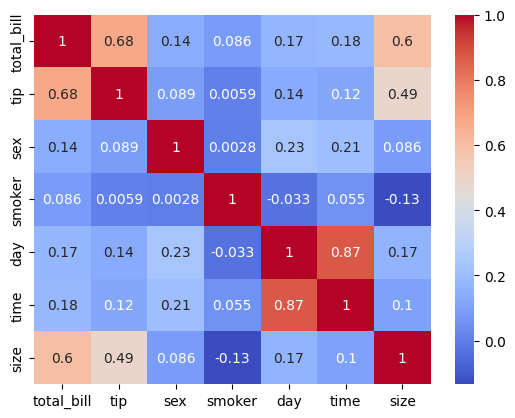

In [103]:
sns.heatmap(corr, cmap="coolwarm", annot=True)

plt.show()

In [97]:
df["sex"] = df["sex"].map({ "Male": 1, "Female": 0})
df["smoker"] = df["smoker"].map({"Yes": 1,"No": 0})
df["day"] = df["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
df["time"] = df["time"].map({"Lunch": 0, "Dinner": 1})
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,1,0,2,1,4
140,17.47,3.50,0,0,0,0,2
206,26.59,3.41,1,1,2,1,3
19,20.65,3.35,1,0,2,1,3
208,24.27,2.03,1,1,2,1,2


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = np.array(df[["total_bill", "sex", "smoker", "day", "time", "size"]])
y = np.array(df["tip"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

In [99]:
# Evaluate the model on the testing set
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R-squared:', r2)

MSE: 0.6963090766605347
R-squared: 0.44293996874899


In [100]:
# Perform hypothesis testing on the relationship between tips and bill amount
import statsmodels.api as sm

X = df[['total_bill']]
y = df['tip']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 01 May 2023   Prob (F-statistic):           6.69e-34
Time:                        04:43:35   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0